<a href="https://colab.research.google.com/github/sebagit914/Exam2_Hotel_Booking/blob/main/Hotel_Bookings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

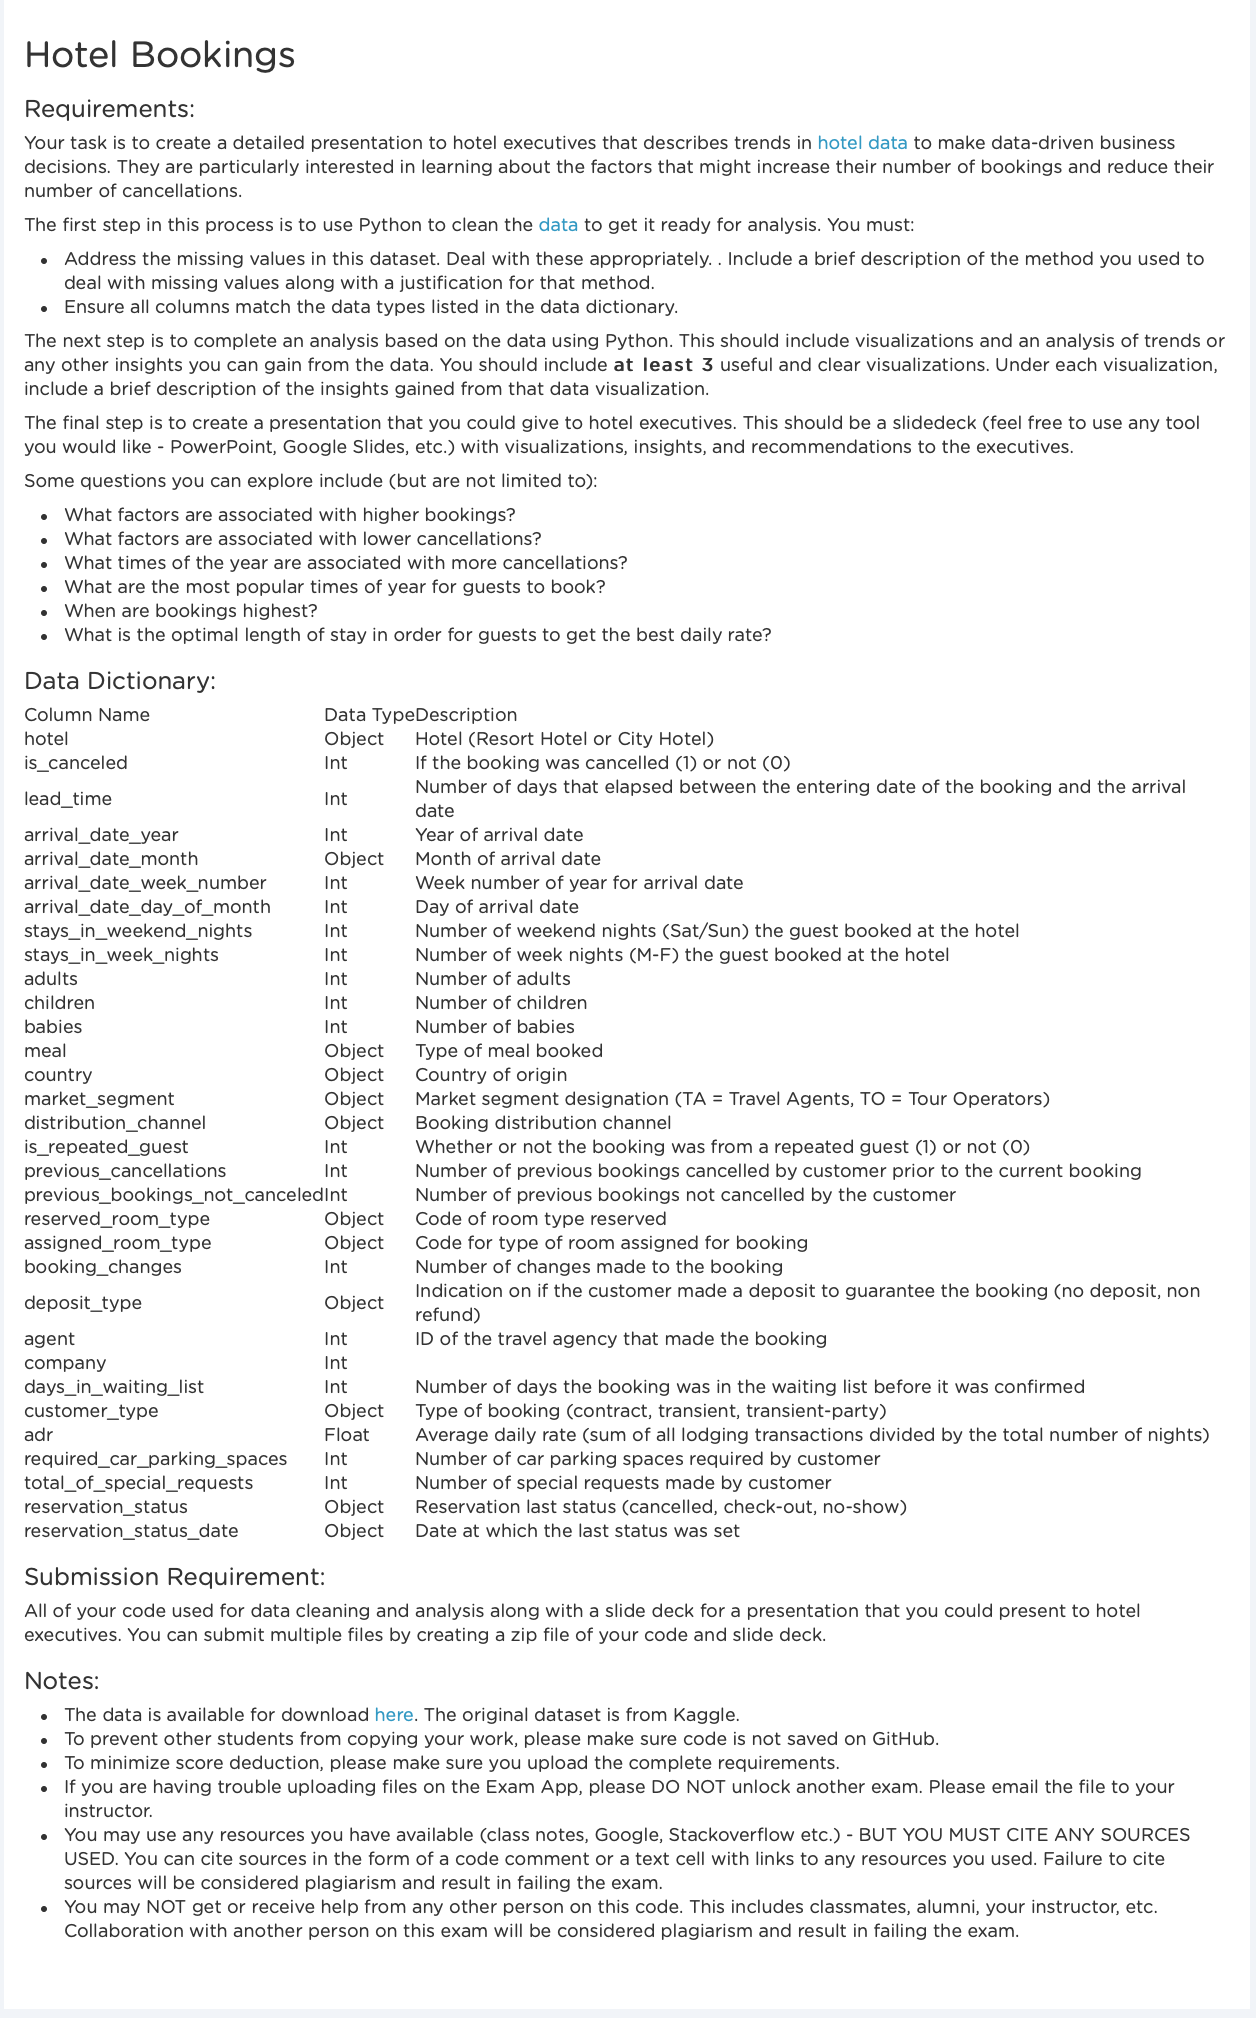

# 1 Importar librerías


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2 Montar Google Colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 3 Cargar base de datos


**El objetivo de esta sección será:**
Asegurar de que se han cargado los datos correctamente
Ver qué tipo de datos contiene
Revisar la validez de los datos

In [ ]:
filename = '/content/drive/MyDrive/PTDataScience/PandasForDataManipulation/Assigment/hotel_bookings.csv'

df = pd.read_csv(filename)
df.head(5)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
# Con este método observamos las últimas filas del dataset
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [ ]:
#Utilizamos el atributo shape para conocer la estructura del dataframe. Observamos que contiene 119.390  filas y 32 columnas
df.shape

(119390, 32)

In [ ]:
df.dtypes.value_counts()

int64      15
object     13
float64     4
dtype: int64

In [ ]:
# Verificar que las columnas coincidan con el diccionario de datos señalado en el enunciado
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number           object
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             



*   arrival_date_week_number           object / change to Int
*   children                          float64 / change to Int
*   agent                             float64 / change to Int
*   company                           float64 / change to Int

Antes de convertir las variables, necesitamos verificar si contiene varaibles nulas


In [ ]:
#convert columns 

#arrival_date_week_number object / change to Int
#children float64 / change to Int
#agent float64 / change to Int
#company float64 / change to Int

# 4 Limpieza de datos

In [ ]:
#Observamos que para los valores nulos , sólo se indica en la columna children: 4 ; country:  488, agent: 16340, company: 112593
df.apply(lambda x: sum(x.isnull())).sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
is_canceled                            0
market_segment                         0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
babies                                 0
meal                                   0
reservation_status_date                0
distribution_channel                   0
reservation_status                     0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes 

Para el caso de la columna children , reemplazaremos con 0 y convertiremos la variable según diccionario

In [ ]:
df['children'].fillna(df['children'].mode()[0.0], inplace = True)

In [ ]:
#Convertir columna children a int
df['children'] = df['children'].apply(np.int64)
df['children'].dtypes 

dtype('int64')

Para los nulos de las columnas company y agente, reemplazamos en 0.0 dado que cuentan con id identificador. Se reemplaza en 0.0 dado que están en formato float.

In [ ]:
df['agent'].fillna(df['agent'].mode()[0.0], inplace = True)


In [ ]:
df['company'].fillna(df['company'].mode()[0.0], inplace = True)


In [ ]:
df.apply(lambda x: sum(x.isnull())).sort_values(ascending=False)

country                           488
reservation_status_date             0
reservation_status                  0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            0
babies                              0
meal                                0
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
agent                               0
company                             0
days_in_wait

Para el caso de los nulos de la columna 'country' utilizamos la misma función pero le asignamos el valor con mayor frecuencia.

In [ ]:
df['country'].fillna(df['country'].mode().to_string(), inplace=True)
df.apply(lambda x: sum(x.isnull()))

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [ ]:
df['agent'].astype(int)

0           9
1           9
2           9
3         304
4         240
         ... 
119385    394
119386      9
119387      9
119388     89
119389      9
Name: agent, Length: 119390, dtype: int64

In [ ]:
df['company'].astype(int)

0         40
1         40
2         40
3         40
4         40
          ..
119385    40
119386    40
119387    40
119388    40
119389    40
Name: company, Length: 119390, dtype: int64

In [ ]:
df['arrival_date_week_number'].head()

0    27
1    27
2    27
3    27
4    27
Name: arrival_date_week_number, dtype: object

# 5 Análisis exploratorio de datos (EDA)

El caso plantea aprender sobre los factores podrían aumentar su número de reservas y reducir su número de cancelaciones.

Por lo tanto, respecto a la metodologia de desarrollo se propone analizar tanto las variables numericas (correlación) y categóricas. Una vez desarrollado este analisis , procederemos a generar las conclusiones respecto a los factores que están detrás del aumento de reservas y la reducción de cancelaciones.

## 5.1 Reservas efectivas

Para comenzar nuestro análisis, iniciamos identificando el número de cancelaciones versus las reservas efectivas

In [ ]:
df['is_canceled'].value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

In [ ]:
pd.crosstab(index=df['is_canceled'], columns='count')
frec = pd.crosstab(index=df['is_canceled'], columns='count')
(frec/frec.sum())*100

col_0,count
is_canceled,
0,62.958372
1,37.041628


Se cancelaron 44.224 reservas, correspondiente al 37% entre los años 2015 y 2017

In [ ]:
#Queremos responder las preguntas específicas respecto al segmento que hizo la reserva pero no cancelo. Por lo tanto, comenzaremos analizando este segmento
f1 = df['is_canceled'] == 0
df1 = df.loc[f1, :]
df1.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,9.0,40.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,9.0,40.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,9.0,40.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,40.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,40.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


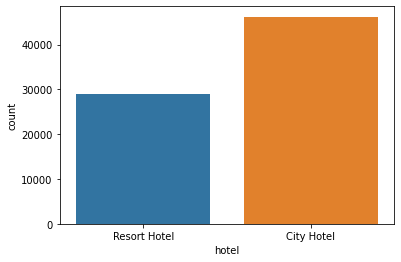

In [ ]:
#Se observa que la mayor cantidad de booking se produce en hotel de la ciudad
sns.countplot(x ='hotel',  data = df1)

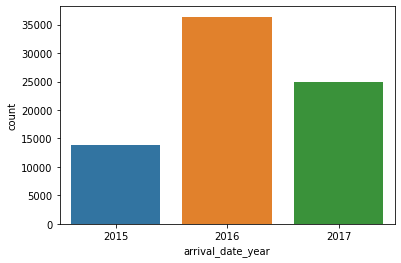

In [ ]:
#Las reservas efectivas si bien entre el 2015 y 2016 crecen, se observa una caída importante al 2017
sns.countplot(x ='arrival_date_year',  data = df1)

In [ ]:
#Los meses de mayor demanda , se encuentran en Agosto y Julio. Respecto a los meses de menor reserva: Enero y diciembre.
df1['arrival_date_month'].value_counts().sort_values(ascending = False)

August       8638
July         7919
May          7114
October      6914
March        6645
April        6565
June         6404
September    6392
February     5372
November     4672
December     4409
January      4122
Name: arrival_date_month, dtype: int64

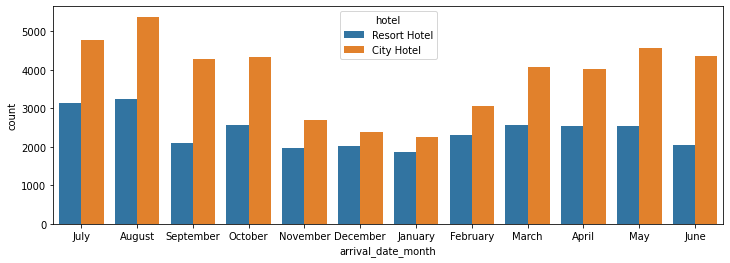

In [ ]:
#Las reservas más altas ocurren en el hotel de la ciudad y principalmente en los meses de junio, julio y agosto
plt.subplots(figsize=(12,4))
sns.countplot(x='arrival_date_month', hue='hotel',  data=df1)

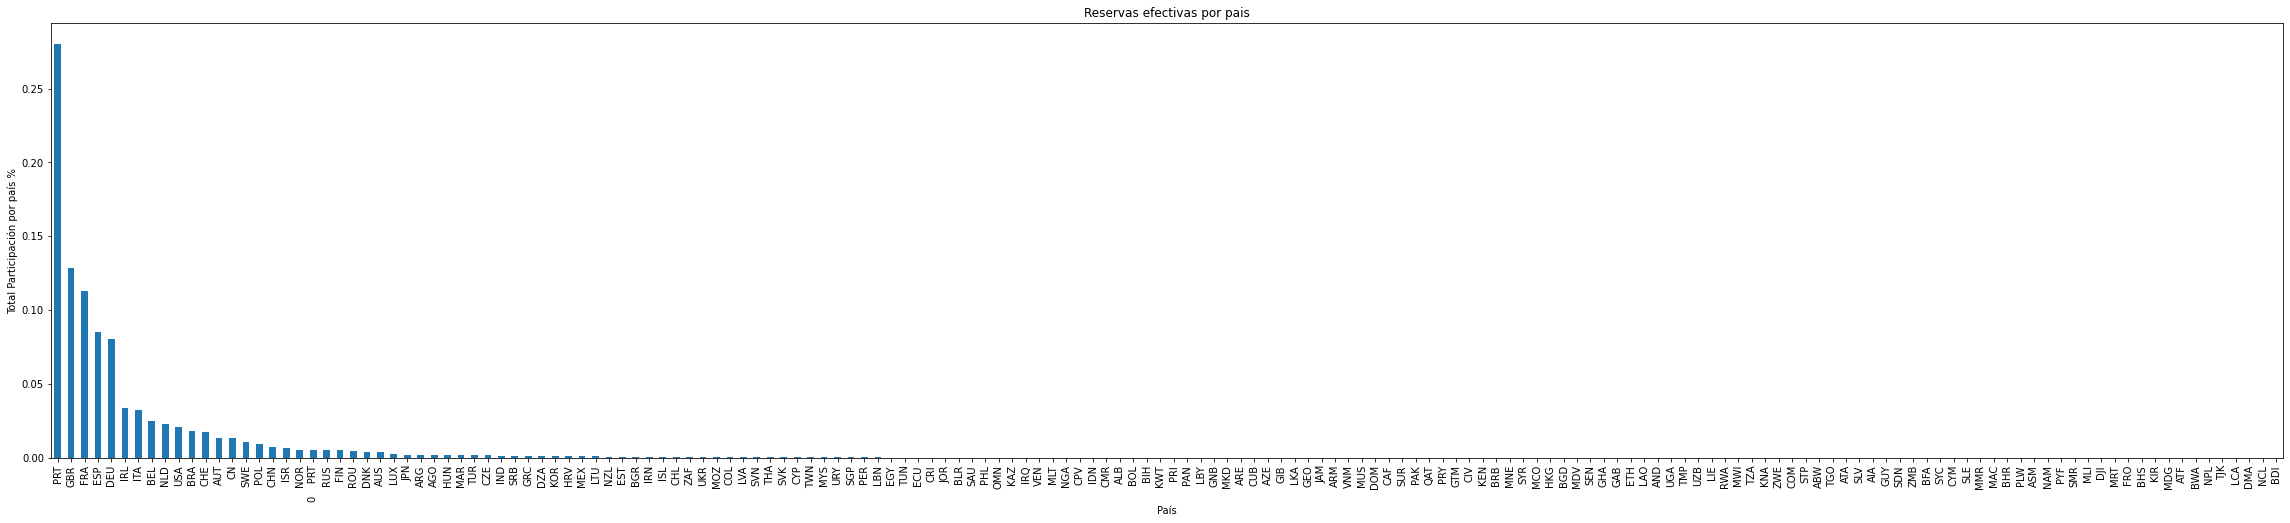

In [ ]:
#Portugal y Alemania junto con Francia son los paises con mayor cantidad de reservas efectivas.
plt.figure(figsize=(40,8))
df1.country.value_counts(normalize=True).plot(title = 'Reservas efectivas por pais', kind="bar")
plt.xlabel('País')
plt.ylabel('Total Participación por país %')

plt.show()

In [ ]:
df3 = df

In [ ]:
df3['is_canceled'] = [0 if item == 0 else 1 for item in df3['is_canceled']]

In [ ]:
df3.corr()

,is_canceled,lead_time,arrival_date_year,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.293123,0.016660,-0.006130,-0.001791,0.024765,0.060017,0.005036,-0.032491,-0.084793,0.110133,-0.057358,-0.144381,-0.049857,-0.076124,0.054186,0.047557,-0.195498,-0.234658
lead_time,0.293123,1.000000,0.040142,0.002268,0.085671,0.165799,0.119519,-0.037613,-0.020915,-0.124410,0.086042,-0.073548,0.000149,-0.017975,-0.074531,0.170084,-0.063077,-0.116451,-0.095712
arrival_date_year,0.016660,0.040142,1.000000,-0.000221,0.021497,0.030883,0.029635,0.054636,-0.013192,0.010341,-0.119822,0.029218,0.030872,0.056905,0.039718,-0.056497,0.197580,-0.013684,0.108531
arrival_date_day_of_month,-0.006130,0.002268,-0.000221,1.000000,-0.016354,-0.028174,-0.001566,0.014553,-0.000230,-0.006145,-0.027011,-0.000300,0.010613,0.000321,0.004871,0.022728,0.030245,0.008683,0.003062
stays_in_weekend_nights,-0.001791,0.085671,0.021497,-0.016354,1.000000,0.498969,0.091871,0.045794,0.018483,-0.087239,-0.012775,-0.042715,0.063281,0.158992,-0.071007,-0.054151,0.049342,-0.018554,0.072671
stays_in_week_nights,0.024765,0.165799,0.030883,-0.028174,0.498969,1.000000,0.092976,0.044203,0.020191,-0.097245,-0.013992,-0.048743,0.096209,0.193228,-0.034245,-0.002020,0.065237,-0.024859,0.068192
adults,0.060017,0.119519,0.029635,-0.001566,0.091871,0.092976,1.000000,0.030440,0.018146,-0.146426,-0.006738,-0.107983,-0.051673,0.019754,-0.145914,-0.008283,0.230641,0.014785,0.122884
children,0.005036,-0.037613,0.054636,0.014553,0.045794,0.044203,0.030440,1.000000,0.024030,-0.032858,-0.024729,-0.021072,0.048952,0.049641,-0.038395,-0.033271,0.324853,0.056255,0.081736
babies,-0.032491,-0.020915,-0.013192,-0.000230,0.018483,0.020191,0.018146,0.024030,1.000000,-0.008943,-0.007501,-0.006550,0.083440,0.030696,-0.008270,-0.010621,0.029186,0.037383,0.097889
is_repeated_guest,-0.084793,-0.124410,0.010341,-0.006145,-0.087239,-0.097245,-0.146426,-0.032858,-0.008943,1.000000,0.082293,0.418056,0.012092,-0.045230,0.125130,-0.022235,-0.134314,0.077090,0.013050


¿Que sucede con el segmento cancelación ?

## 5.2 Reservas canceladas

Las reservas se cancelaron el 37% del tiempo. Mientras reservaba, el cliente se registró  casi el 63% del tiempo.

In [ ]:
#Queremos analizar en profundidad lo que ocurre con el segmento cancelado
f2 = df['is_canceled'] == 1
df2 = df.loc[f2, :]
df2.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,40.0,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15.0,40.0,0,Transient,105.5,0,0,Canceled,2015-04-22
10,Resort Hotel,1,23,2015,July,27,1,0,4,2,0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,240.0,40.0,0,Transient,123.0,0,0,Canceled,2015-06-23
27,Resort Hotel,1,60,2015,July,27,1,2,5,2,0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,240.0,40.0,0,Transient,107.0,0,2,Canceled,2015-05-11
32,Resort Hotel,1,96,2015,July,27,1,2,8,2,0,0,BB,PRT,Direct,Direct,0,0,0,E,E,0,No Deposit,9.0,40.0,0,Transient,108.3,0,2,Canceled,2015-05-29


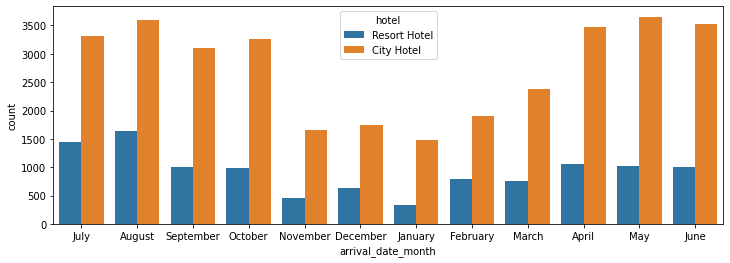

In [ ]:
#Las reservas más altas ocurren en el hotel de la ciudad y principalmente en los meses de junio, julio y agosto
plt.subplots(figsize=(12,4))
sns.countplot(x='arrival_date_month', hue='hotel',  data=df2)

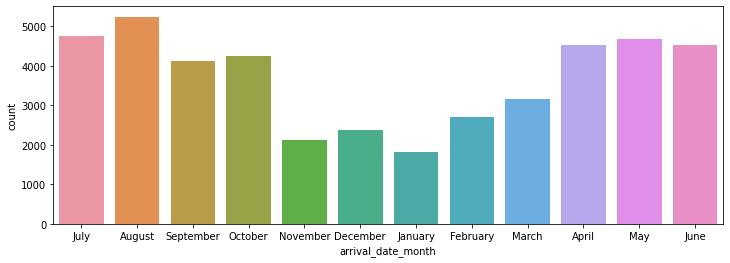

In [ ]:
#Respecto a la época del año con más cancelaciones, debemos realizar el mismo procedimiento pero ahora con el filtro cancelado = 1 
plt.figure(figsize=(12,4))
sns.countplot(x='arrival_date_month',  data= df2)

In [ ]:
#Se rectifica que el mes de agosto y julio son los meses donde ocurren la mayor cantidad de cancelaciones.
df2['arrival_date_month'].value_counts().sort_values(ascending = False)

August       5239
July         4742
May          4677
June         4535
April        4524
October      4246
September    4116
March        3149
February     2696
December     2371
November     2122
January      1807
Name: arrival_date_month, dtype: int64

In [ ]:
df4 = df

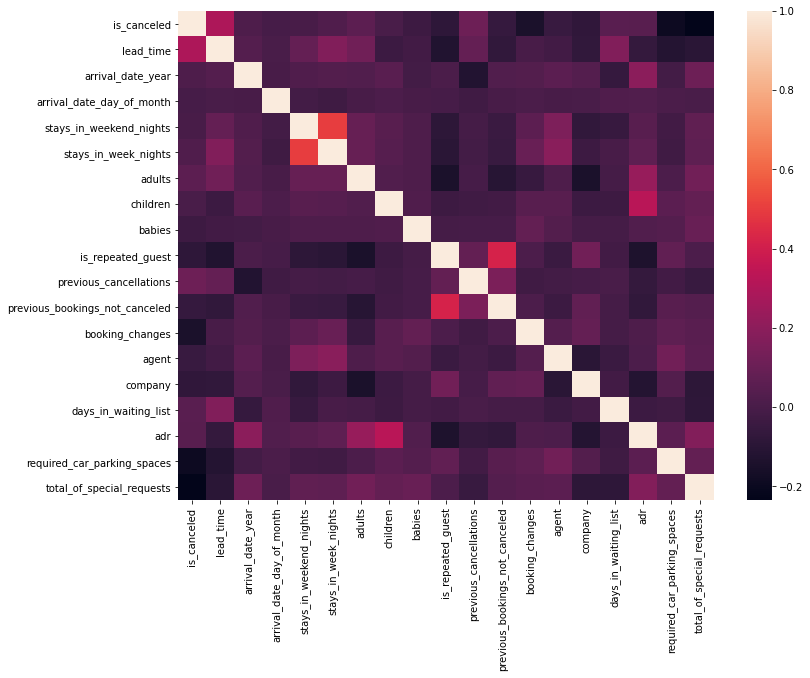

In [ ]:
plt.figure(figsize = (12, 9))
sns.heatmap(df4.corr())
plt.show()